<a href="https://colab.research.google.com/github/m-bashari-m/sample-DNN-projects/blob/main/2.1_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">به نام خدا</div></center>

<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">تمرین عملی 2: طبقه بندی تصاویر Cifar10 با شبکه های کانولوشنالی روی googleColab</div></center></h1>

[![Run in Google Colab](https://github.com/m-bashari-m/SRU-deeplearning-workshop/blob/master/homework/images/colab.png?raw=1)](https://colab.research.google.com/github/alireza-akhavan/SRU-deeplearning-workshop/blob/master/homework/ex2-conv-cifar10-in-colab.ipynb)

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">صورت مساله</div>


<div style="direction:rtl;text-align:right;font-family:Tahoma">
با شبکه های کانولوشنالی آشنا شدیم<br>
توصیه می‌شود حتما بعد از تمرین اول این تمرین را حل کنید و قبل از این تمرین نوت بوک زیر را  مرور کنید:
</div>

[06_ConvolutionalNeuralNetwork-Hoda-Keras.ipynb ](https://nbviewer.jupyter.org/github/alireza-akhavan/SRU-deeplearning-workshop/blob/master/06_ConvolutionalNeuralNetwork-Hoda-Keras.ipynb)

<div style="direction:rtl;text-align:right;font-family:Tahoma">
در این تمرین از مجموعه داده تصویری cifar10 استفاده خواهیم کرد. 
<br>
خیلی از اوقات ممکنه دسترسی به GPU نداشته باشیم. حخوشبختانه سرویس های آنلاین و رایگانی هستند که توان محاسباتی رایگان در اختیارمان میگذراند. در این تمرین از شما خواسته شده که این نوت بوک را در گوگل کولب اجرا کنید.
<br>
 قبلا در مورد گوگل کولب دو پست آموزشی نوشته شده است که در صورت تمایل به کسب اطلاعات بیشتر میتوانید بخوانید.
    اما برای اجرا این تمرین نیازی به این جزئیات نخواهید داشت.
</div>

[آشنایی با سرویس ابری Google Colab ](http://blog.class.vision/1397/02/google-colab/)

[اتصال مستقیم سرویس کولب (Google Colab) به درایو (Google Drive) از طریق فایل سیستم FUSE ](http://blog.class.vision/1397/04/%D8%A7%D8%AA%D8%B5%D8%A7%D9%84-%D9%85%D8%B3%D8%AA%D9%82%DB%8C%D9%85-%D8%B3%D8%B1%D9%88%DB%8C%D8%B3-%DA%A9%D9%88%D9%84%D8%A8-google-colab-%D8%A8%D9%87-%D8%AF%D8%B1%D8%A7%DB%8C%D9%88-google-drive/)


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود کتابخانه های مورد نیاز </div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
کتابخانه های مورد نیاز این تمرین لود شده اند
<br>
در صورت نیاز میتوانید کتابخانه های بیشتری لود کنید:
</div>

In [9]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Add, Activation, InputLayer
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">مجموعه داده ی Cifar10 </div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
<br>
این مجموعه داده تصاویر رنگی در اندازه ی 32 در 32 و در 10 کلاس مختلف شامل ماشین، کامیون، اسب و ... است که در چارچوب کراس موجود است و از همان استفاده میکنیم.
<br>
اطلاعات بیشتر در مورد این مجموعه داده را از سایت این مجموعه داده میتوانید مطالعه کنید:
<br>
</div>

https://www.cs.toronto.edu/~kriz/cifar.html

In [10]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">نگاهی به مجموعه داده بیندازیم...</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
در زیر تصویری که در اندیس 7-ام این مجموعه داده قرار دارد را مشاهده می‌کنیم. این شماره را را به دلخوه عوض کنید و چند تصویر دیگر این مجموعه داده را ببینید.
</div>


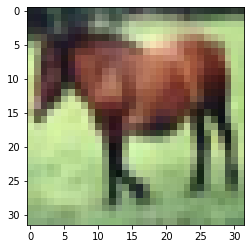

In [ ]:
plt.imshow(x_train[7])

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 1:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
ماتریس های تصویر را تبدیل به نوع داده ای float32 کنید و مقادیر پیکسل ها را نرمال کنید و بین 0 و 1 بیاورید.
<br>
<b>راهنمایی: </b>
شما باید متد astype را صدا بزنید و در نهایت مقادیر پیکسل ها را تقسیم بر 255 کنید.</div>

In [11]:
x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255

In [12]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 2:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
همان طور که میبینید لیبل ها از نوع عددی هستند. آن ها را تبدیل به فرمت one-hot کنید.<br>
</div>


<hr>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
تعدادی از لیبل ها قبل از تبدیل به فرمت one-hot:</div>

In [ ]:
y_train[0:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [13]:
n_classes = np.max(y_train) + 1
y_train = keras.utils.to_categorical(y_train, num_classes=n_classes)
y_test = keras.utils.to_categorical(y_test, num_classes=n_classes)

<div style="direction:rtl;text-align:right;font-family:Tahoma">
تعدادی از لیبل ها بعد از تبدیل به فرمت one-hot:</div>

In [ ]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 3:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
یک شبکه کانولوشنالی با معماری زیر بسازید:
<ul>
    <li>
    یک لایه کانولوشنی با32 فیلتر با سایز فیلتر 3x3 و تابع فعالیت relu
    </li>
    <li>
    لایه ی pooling با pool_size=(2,2)
    </li>
    <li>
    یک لایه کانولوشنی با32 فیلتر با سایز فیلتر 3x3 و تابع فعالیت relu
    </li>
    <li>
    لایه ی pooling با pool_size=(2,2)
    </li>
    <li>
    یک لایه کانولوشنی با64 فیلتر با سایز فیلتر 3x3 و تابع فعالیت relu
    </li>
    <li>
    لایه ی pooling با pool_size=(2,2)
    </li>
    <li>
    استفاده از لایه ی Flatten() . به نظرتون چرا؟
    </li>    
    <li>
    یک لایه Dropout با ترخ 0.5.
    </li>
    <li>
    یک لایه softmax برای احتمالات خروجی. به نظرتون این لایه چند نوران میخواهد؟
    </li>    
 
</ul>
</div>


In [ ]:
model = Sequential([
            Conv2D(32, (3,3), activation='relu', input_shape=list(x_train.shape[1:])),
            MaxPooling2D((2,2)),
            Conv2D(32, (3,3), activation='relu'),
            MaxPooling2D((2,2)),
            Conv2D(64, (3,3), activation='relu'),
            MaxPooling2D((2,2)),
            Flatten(),
            Dropout(.5),
            Dense(10, activation='softmax')])

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 4:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
مدل را کامپایل کنید و به عنوان optimizer متغیر opt_rms به تابع ارسال کنید. </div>


In [ ]:
opt_rms = keras.optimizers.RMSprop(learning_rate=0.001,decay=1e-6)
model.compile(optimizer=opt_rms, loss='categorical_crossentropy', metrics=['accuracy'])

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 5:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
با فراخوانی متد fit روی مدل آن را آموزش بدهید. برای سادگی25 ایپاک با سایز بچ 64 بزنید. 
    <br>
 به عنوان دیتای validation نیز x_test و y_test را ارسال کنید که در هر سری کارایی روی داده های تست اعلام شود.
</div>

In [ ]:
history = model.fit(x_train, y_train, 
                    epochs=25, 
                    batch_size=64, 
                    validation_data=(x_test, y_test))

Epoch 1/25
782/782 [==============================] - 19s 11ms/step - loss: 1.8336 - accuracy: 0.3238 - val_loss: 1.5650 - val_accuracy: 0.4230
Epoch 2/25
782/782 [==============================] - 8s 10ms/step - loss: 1.5271 - accuracy: 0.4451 - val_loss: 1.3451 - val_accuracy: 0.5226
Epoch 3/25
782/782 [==============================] - 8s 11ms/step - loss: 1.3992 - accuracy: 0.4967 - val_loss: 1.4367 - val_accuracy: 0.4931
Epoch 4/25
782/782 [==============================] - 8s 10ms/step - loss: 1.3252 - accuracy: 0.5249 - val_loss: 1.2573 - val_accuracy: 0.5547
Epoch 5/25
782/782 [==============================] - 9s 11ms/step - loss: 1.2634 - accuracy: 0.5501 - val_loss: 1.1747 - val_accuracy: 0.5870
Epoch 6/25
782/782 [==============================] - 8s 10ms/step - loss: 1.2101 - accuracy: 0.5711 - val_loss: 1.3670 - val_accuracy: 0.5320
Epoch 7/25
782/782 [==============================] - 8s 11ms/step - loss: 1.1713 - accuracy: 0.5851 - val_loss: 1.1048 - val_accuracy: 0.609

In [14]:
import pandas as pd
def plot_history(history):
  pd.DataFrame(history.history).plot()

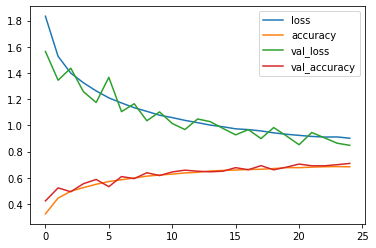

In [ ]:
plot_history(history)

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 6:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
شبکه و هایپرپارامترهای این شبکه را به هر نحوی دوست دارید تغییر دهید تا دقت روی دادگان تست را به حداکثر برسانید.
</div>


In [36]:
class ConvolutionalBlock(keras.layers.Layer):
  def __init__(self, kernel_size, filters, strides=(2, 2),**kwargs):
    super(ConvolutionalBlock, self).__init__(**kwargs)

    self.main_layers = [Conv2D(filters[0], kernel_size=(1,1), strides=strides),
                        BatchNormalization(),
                        Activation('relu'),
                        
                        Conv2D(filters[1], kernel_size=kernel_size, strides=(1,1), padding='same'),
                        BatchNormalization(),
                        Activation('relu'),
                        
                        Conv2D(filters[2], kernel_size=(1,1)),
                        BatchNormalization()]

    self.residual_layers = [Conv2D(filters[2], kernel_size=(1,1), strides=strides),
                            BatchNormalization()]

  def call(self, X):
    X_initial = X

    for layer in self.main_layers:
      X = layer(X)

    for layer in self.residual_layers:
      X_initial = layer(X_initial)

    X = Add()([X, X_initial])
    X = Activation('relu')(X)
    return X




In [49]:
class IdentityBlock(keras.layers.Layer):
  def __init__(self, kernel_size, filters, **kwargs):
    super(IdentityBlock, self).__init__(**kwargs)
    self.kernel_size = kernel_size
    self.layers_in_block = 3
    self.filter_kernel_pair = zip(filters, [(1,1), kernel_size, (1,1)])

  def call(self, X):
    X_initial = X

    for i, filter_kernel_pair in enumerate(self.filter_kernel_pair):
      filter_size = filter_kernel_pair[0]
      kernel_size = filter_kernel_pair[1]

      X = Conv2D(filter_size, kernel_size=kernel_size, padding='same')(X)
      X = BatchNormalization()(X)

      # If it is not the last layer
      if i+1 < self.layers_in_block:
        X = Activation('relu')(X)

      # In the last layer
      else:
        X = Add()([X, X_initial]) # Skip connection
        X = Activation('relu')(X)
      
    return X


In [99]:
class ResNet(keras.models.Model):
  def __init__(self, num_classes, num_init_filters, max_stages, **kwargs):
    super(ResNet, self).__init__(**kwargs)

    self.max_stages = 3
    self.stage1_conv = Conv2D(num_init_filters, kernel_size=(3,3))
    self.batch_norm = BatchNormalization()
    self.activation = Activation('relu')
    self.max_pool = MaxPooling2D((2,2), strides=2)

    self.stages_layers = []
    for i in range(0,self.max_stages):
      conv_block = ConvolutionalBlock((3,3), 
                                      [num_init_filters*(2**i), num_init_filters*(2**i), num_init_filters*(2**(i+1))],
                                      name='Conv_stage_{}'.format(i+2))
      
      iden_block = IdentityBlock((3,3), 
                                 [num_init_filters*(2**i), num_init_filters*(2**i), num_init_filters*(2**(i+1))],
                                 name='Iden_stage_{}'.format(i+2))
      
      self.stages_layers.extend([conv_block, iden_block])

    self.glob_pool = GlobalAveragePooling2D()
    self.flatten = Flatten()
    self.dropout = Dropout(.5)
    self.dense = Dense(200)
    self.classifier = Dense(num_classes)

  def call(self, X):
    X = self.stage1_conv(X)
    X = self.batch_norm(X)
    X = self.activation(X)
    X = self.max_pool(X)

    for layer in self.stages_layers:
      X = layer(X)

    X = self.glob_pool(X)
    
    return X


In [100]:
model = ResNet(n_classes, 64, 3)
loss = keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.SGD(1e-2)
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])


AttributeError: ignored

In [ ]:
model(x_train[:2])
model.summary()

In [88]:
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 35s 21ms/step - loss: 1.5544 - accuracy: 0.4361 - val_loss: 1.5835 - val_accuracy: 0.4453
Epoch 2/20
1563/1563 [==============================] - 32s 20ms/step - loss: 1.2045 - accuracy: 0.5658 - val_loss: 1.4524 - val_accuracy: 0.5014
Epoch 3/20
1563/1563 [==============================] - 32s 20ms/step - loss: 1.0348 - accuracy: 0.6333 - val_loss: 1.2950 - val_accuracy: 0.5356
Epoch 4/20
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9027 - accuracy: 0.6821 - val_loss: 1.5762 - val_accuracy: 0.4927
Epoch 5/20
1563/1563 [==============================] - 32s 20ms/step - loss: 0.7901 - accuracy: 0.7214 - val_loss: 1.7138 - val_accuracy: 0.4742
Epoch 6/20
1563/1563 [==============================] - 32s 20ms/step - loss: 0.6950 - accuracy: 0.7561 - val_loss: 1.4642 - val_accuracy: 0.5434
Epoch 7/20
1563/1563 [==============================] - 32s 20ms/step - loss: 0.6074 - accuracy: 0.7905 - val_loss: 1.2828 -

KeyboardInterrupt: ignored

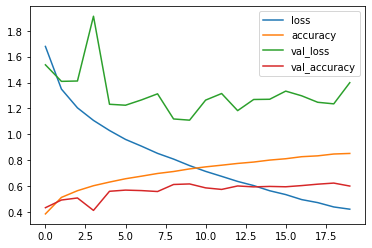

In [61]:
plot_history(history)

<div class="alert alert-block alert-info">
<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> دوره مقدماتی یادگیری عمیق<br>علیرضا اخوان پور<br>پنج شنبه، ۱۸ و ۲۵ بهمن ۱۳۹۷<br>
</div>
<a href="http://class.vision">Class.Vision</a> - <a href="http://AkhavanPour.ir">AkhavanPour.ir</a> - <a href="https://github.com/Alireza-Akhavan/">GitHub</a>

</div>